In [71]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import matplotlib.pyplot as plt # plotting (optional)
%matplotlib inline 

In [72]:
df= pd.read_csv('OG_data_cases.csv', sep=',')

In [73]:
df

,Unnamed: 0,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city.1,year.1,weekofyear.1,total_cases
0,1,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,2,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,3,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,4,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,5,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6
5,6,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,...,2.100000,28.114286,6.942857,34.4,23.9,39.1,sj,1990,23,2
6,7,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,...,2.042857,27.414286,6.771429,32.2,23.3,29.7,sj,1990,24,4
7,8,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,...,1.571429,28.371429,7.685714,33.9,22.8,21.1,sj,1990,25,5
8,9,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,...,1.885714,28.328571,7.385714,33.9,22.8,21.1,sj,1990,26,10
9,10,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,...,2.014286,28.328571,6.514286,33.9,24.4,1.1,sj,1990,27,6


In [98]:
linear = smf.ols(formula = 'total_cases~station_avg_temp_c', data=df).fit()
# Then, use the `.summary()` method of your model to print our information about your model
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     19.28
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.21e-05
Time:                        17:37:18   Log-Likelihood:                -7342.4
No. Observations:                1413   AIC:                         1.469e+04
Df Residuals:                    1411   BIC:                         1.470e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -82.5390     24.510     -3.368      0.001    -130.618     -34.460
station_avg_temp_c     3.9544      0.901      4.391      0.000       2.188       5.721
==============================================================================
Omnibus:                     1480.308   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79699.572
Skew:                           5.163   Prob(JB):                         0.00
Kurtosis:                      38.314   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
linear1 = smf.ols(formula = 'total_cases~station_avg_temp_c + reanalysis_avg_temp_k', data=df).fit()
linear1
# Then, use the `.summary()` method of your model to print our information about your model
linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     16.18
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.13e-07
Time:                        17:37:19   Log-Likelihood:                -7336.0
No. Observations:                1413   AIC:                         1.468e+04
Df Residuals:                    1410   BIC:                         1.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1255.3987    373.072      3.365      0.001     523.563    1987.235
station_avg_temp_c        0.2854      1.359      0.210      0.834      -2.380       2.951
reanalysis_avg_temp_k     5.0116      1.394      3.594      0.000       2.276       7.747
==============================================================================
Omnibus:                     1494.369   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83685.958
Skew:                           5.230   Prob(JB):                         0.00
Kurtosis:                      39.222   Cond. No.                     8.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
linear2 = smf.ols(formula = 'total_cases~station_avg_temp_c + reanalysis_avg_temp_k + station_max_temp_c', data=df).fit()
linear2
# Then, use the `.summary()` method of your model to print our information about your model
linear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     28.39
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           8.03e-18
Time:                        17:37:20   Log-Likelihood:                -7310.5
No. Observations:                1413   AIC:                         1.463e+04
Df Residuals:                    1409   BIC:                         1.465e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               892.1920    370.017      2.411      0.016     166.349    1618.035
station_avg_temp_c        8.8795      1.792      4.954      0.000       5.363      12.396
reanalysis_avg_temp_k     3.6319      1.383      2.625      0.009       0.918       6.346
station_max_temp_c       -6.5140      0.907     -7.186      0.000      -8.292      -4.736
==============================================================================
Omnibus:                     1529.390   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95145.742
Skew:                           5.397   Prob(JB):                         0.00
Kurtosis:                      41.724   Cond. No.                     8.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
linear3 = smf.ols(formula = 'total_cases~station_avg_temp_c + reanalysis_avg_temp_k + station_max_temp_c + reanalysis_specific_humidity_g_per_kg', data=df).fit()
linear3
# Then, use the `.summary()` method of your model to print our information about your model
linear3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_cases   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     21.72
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.08e-17
Time:                        17:37:20   Log-Likelihood:                -7309.7
No. Observations:                1413   AIC:                         1.463e+04
Df Residuals:                    1408   BIC:                         1.466e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               843.7457    371.831      2.269      0.023     114.344    1573.148
station_avg_temp_c                        7.6224      2.040      3.737      0.000       3.621      11.624
reanalysis_avg_temp_k                     3.4101      1.394      2.447      0.015       0.676       6.144
station_max_temp_c                       -6.4091      0.910     -7.043      0.000      -8.194      -4.624
reanalysis_specific_humidity_g_per_kg     1.4572      1.130      1.290      0.197      -0.759       3.673
==============================================================================
Omnibus:                     1533.034   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96325.353
Skew:                           5.415   Prob(JB):                         0.00
Kurtosis:                      41.972   Cond. No.                     8.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

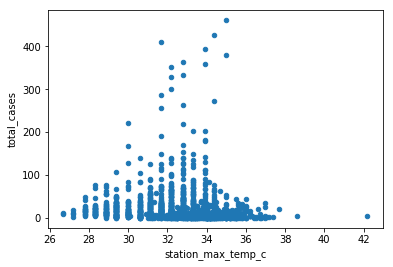

In [102]:
df.plot('station_max_temp_c', 'total_cases', kind='scatter')


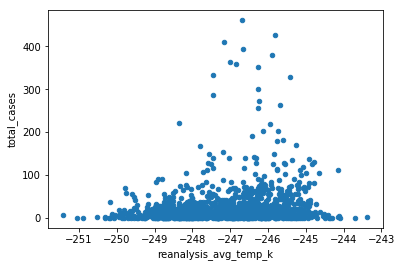

In [103]:
df.plot('reanalysis_avg_temp_k', 'total_cases', kind='scatter')


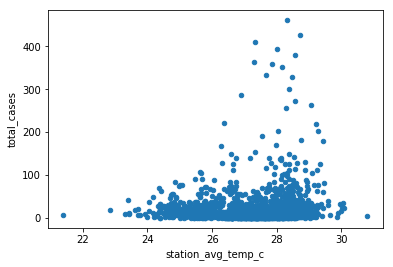

In [104]:
df.plot('station_avg_temp_c', 'total_cases', kind='scatter')


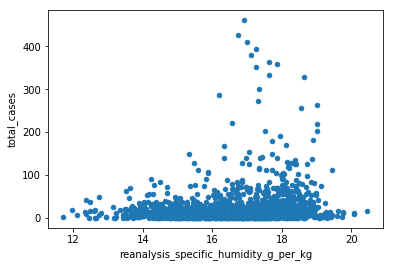

In [105]:
df.plot('reanalysis_specific_humidity_g_per_kg', 'total_cases', kind='scatter')


In [106]:
df['mult_preds'] = pd.Series(linear3.predict())
df

,Unnamed: 0,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city.1,year.1,weekofyear.1,total_cases,mult_preds
0,1,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4,22.065910
1,2,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5,21.385241
2,3,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4,21.831550
3,4,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3,21.490300
4,5,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6,24.059766
5,6,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,...,28.114286,6.942857,34.4,23.9,39.1,sj,1990,23,2,21.934670
6,7,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,...,27.414286,6.771429,32.2,23.3,29.7,sj,1990,24,4,28.888724
7,8,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,...,28.371429,7.685714,33.9,22.8,21.1,sj,1990,25,5,27.428652
8,9,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,...,28.328571,7.385714,33.9,22.8,21.1,sj,1990,26,10,26.931576
9,10,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,...,28.328571,6.514286,33.9,24.4,1.1,sj,1990,27,6,29.796928


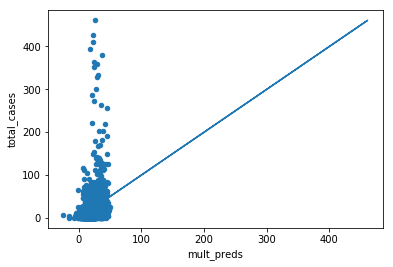

In [117]:
df.plot('mult_preds', 'total_cases', kind='scatter')
plt.plot(df.total_cases, df.mult_preds)

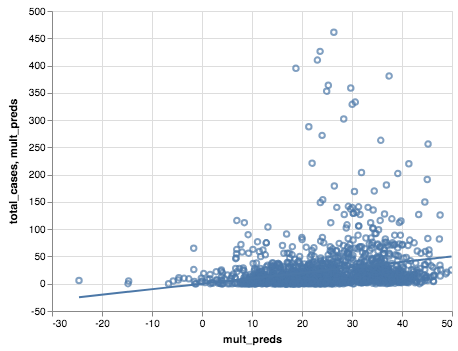

In [108]:
mult_pred = alt.Chart(df).mark_point().encode(
    x='mult_preds',
    y='total_cases',
).interactive()

polynomial_fit = alt.Chart(df).mark_line().encode(
    x='mult_preds',
    y='mult_preds'
)

mult_pred + polynomial_fit


In [112]:
#Can do residual
df['residuals_full'] = df['total_cases'] - df['mult_preds']


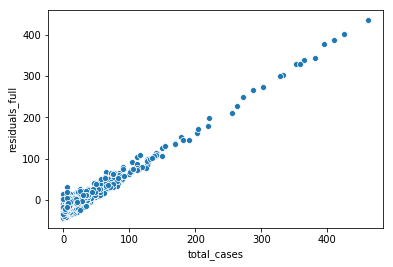

In [113]:
sns.scatterplot(data=df, x = 'total_cases', y = 'residuals_full')